In [20]:
from models import Record, Country
from sqlalchemy import select, join
from dotenv import load_dotenv
from os import getenv
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
load_dotenv()

True

<h3>Let's connect to the <strong>DB</strong></h3>

In [7]:
db_uri = getenv('DATABASE_URI')
engine = create_engine(db_uri)
Session = sessionmaker(bind=engine)

<p>Let's see how many records are in the db and how much take it takes to fetch all of them using SQL</p>

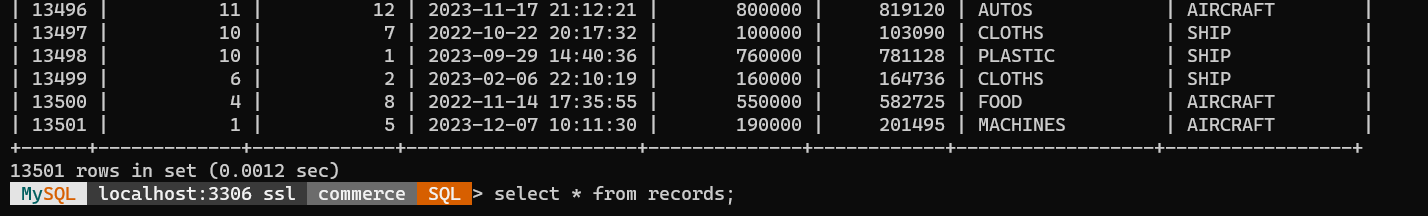

know let's use SQLAlchemy to do the same

In [14]:
import time
with Session() as session:
    st = time.time()

    stmt = select(Record)
    result = session.execute(stmt).scalars()
    et = time.time()
    print('time: ', et - st)
    for index, record in enumerate(result):
        if index < 5:
            print(record.__dict__)


time:  0.025031089782714844
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CEA49B0>, 'exporter_id': 5, 'importer_id': 7, 'total_amount': 100000.0, 'product_category': 'METAL', 'id': 1, 'date': datetime.datetime(2023, 3, 11, 0, 0), 'net_amount': 103070.0, 'shipping_method': 'SHIP'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CEA4710>, 'exporter_id': 11, 'importer_id': 6, 'total_amount': 70000.0, 'product_category': 'AUTOS', 'id': 2, 'date': datetime.datetime(2023, 1, 22, 13, 16, 11), 'net_amount': 72639.0, 'shipping_method': 'SHIP'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CEA4590>, 'exporter_id': 7, 'importer_id': 9, 'total_amount': 250000.0, 'product_category': 'PLANTS', 'id': 3, 'date': datetime.datetime(2023, 10, 30, 12, 43, 25), 'net_amount': 261725.0, 'shipping_method': 'AIRCRAFT'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CEA43B0>, 'exp

Now, let's select the record where the total amount is > 90,000

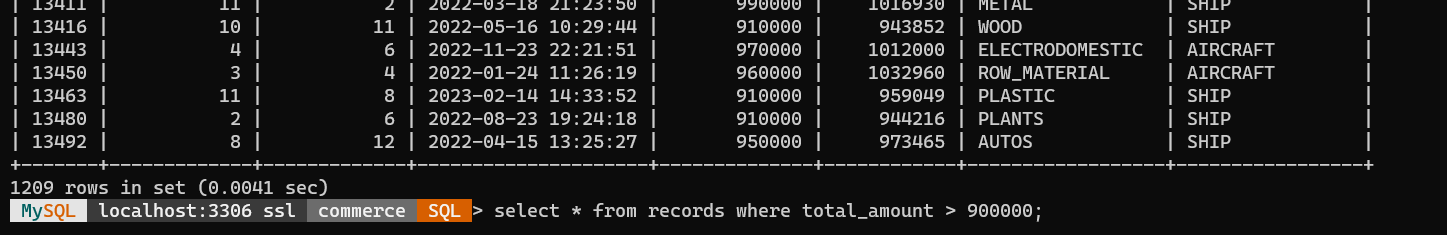

In [19]:
with Session() as session:
    st = time.time()

    stmt = select(Record).where(Record.total_amount > 900_000)
    result = session.execute(stmt).scalars()
    et = time.time()
    print('time: ', et - st)
    for index, record in enumerate(result):
        if index < 5:
            print(record.__dict__)

time:  0.006998777389526367
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CC71610>, 'exporter_id': 6, 'importer_id': 9, 'total_amount': 970000.0, 'product_category': 'MACHINES', 'id': 7, 'date': datetime.datetime(2023, 11, 15, 12, 47, 51), 'net_amount': 1017430.0, 'shipping_method': 'AIRCRAFT'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CC715B0>, 'exporter_id': 6, 'importer_id': 7, 'total_amount': 940000.0, 'product_category': 'FOOD', 'id': 12, 'date': datetime.datetime(2022, 8, 10, 20, 40, 39), 'net_amount': 970832.0, 'shipping_method': 'SHIP'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CC72D50>, 'exporter_id': 5, 'importer_id': 9, 'total_amount': 920000.0, 'product_category': 'METAL', 'id': 24, 'date': datetime.datetime(2022, 10, 11, 11, 47, 51), 'net_amount': 963056.0, 'shipping_method': 'SHIP'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002707CC

Now let's fetch country name and total amount of the recrods info where the product_category is "FOOD" and the total amount is < 100,000

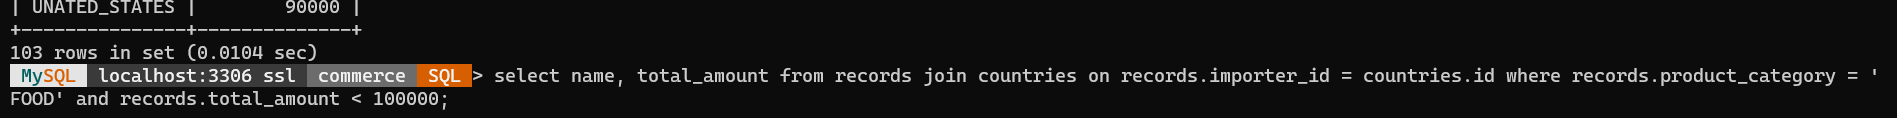

In [38]:
with Session() as session:
    st = time.time()
    stmt = (select(Country.name, Record.total_amount)
            .join(Country, Record.importer_id == Country.id)
            .where((Record.product_category == 'FOOD') & (Record.total_amount < 100_000)))
    result = session.execute(stmt)
    et = time.time()
    print('time: ', et - st)

    print(result)
    for index, record in enumerate(result):
        if index < 5:
            print(record)

time:  0.021088600158691406
('CANADA', 40000.0)
('CANADA', 20000.0)
('CANADA', 20000.0)
('CANADA', 70000.0)
('CANADA', 80000.0)
